First, type your name in the code cell below and run the cell.



In [ ]:
# @title Full Name { run: "auto" }
Name = 'AKETCH ADHIAMBO OKOTH' # @param {type:"string", placeholder:"Enter Full Name"}
print("Name:", Name)

Name: AKETCH ADHIAMBO OKOTH


# Assignment 3

## Directions

In this assignment, you will perform Logistic Regression and Naive Bayes classification analysis and compare model performance.

Include your code and any required written responses immediately under the relevant question prompt in the space provided.

You will include your answers in this .ipynb template notebook in the space provided under the numbered questions below. Under the numbered questions there is either a code cell or text cell provided for your response.

There are 3 deliverables for this assignment:

> 1.   ***The link to your Google Colab notebook file***: Submit the link to your notebook file. To do so, click **Share** on the top right-hand side. Then a box will pop-up. You need to change **"restricted"** to **"anyone with the link."** Then, copy the link and paste it as a comment when submitting the assignment on Canvas.
> 2.   ***The IPYNB notebook file***: Download the same file as ipynb. To do so, Go to **File**, select **Download**. Then Click on **ipynb** on the menu box.
> 3.   ***The PDF version of your notebook file***: Download the same file as pdf. To do so, Go to **File**, select **Print**,A menu box will pop up. Then Click on **PDF** on the menu box. This will convert the file into a PDF file, instead of printing it using a printer.

All written responses must be in your own words. If using AI in any capacity to aid with written responses to assignment question prompts,  there is 1 additional required deliverable for the assignment.
> 1.   ***A PDF of all AI prompts and responses used***: Submit this information aggregated as a PDF.

If this is not included and responses appear to be AI generated you will receive a 0 for the assignment. If this is included and your written responses are plagiarized, you will receive a 0 for the assignment.

Rename this template file - <b>LastnameFirstname_A#.ipynb</b>, where # is the assignment number. As an example, my Assignment #1 would be named **HillChelsey_A1.ipynb**. Your .pdf file should follow the same file naming format (for example, my Assignment #1 .pdf file would be named **HillChelsey_A1.pdf**).

**Note**: Points will be deducted for extraneous code in the submissions, inefficient code, incorrect file naming, and if your answers are not in the space provided for answers.









## Business Case

You work in analytics for the Ritz Carlton Hotel Company, a multinational corporation operating luxury chain hotels. The hotel chain is known for offering luxury services, including food and beverage. You have been tasked with automating the process of wine selection for the hotels by the Head Corporate Sommelier. You will use the **[whitewine-classification.csv](https://github.com/CHill-MSU/INFO583/blob/main/whitewine-classification.csv)** data in your analysis, which includes characteristics of the wines.


<hr>

## Prerequisite Code

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB, ComplementNB
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

## Questions

>  0. **(a) First, use the 'whitewine-classification.csv' file to create a dataframe named data. Then, view the first 5 observations in the `data` dataframe.**

In [ ]:
data = pd.read_csv('whitewine-classification.csv') # reading the dataset
data.head() # first 5 observations preview

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,goodwine
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0


>  0. **(b) View the dataframe information to evaluate variable types and missingness.**

In [ ]:
data.info()# dataframe overview

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         4898 non-null   float64
 1   volatile_acidity      4898 non-null   float64
 2   citric_acid           4898 non-null   float64
 3   residual_sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free_sulfur_dioxide   4898 non-null   float64
 6   total_sulfur_dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  goodwine              4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [ ]:
data.isnull().sum() # missing values

,0
fixed_acidity,0
volatile_acidity,0
citric_acid,0
residual_sugar,0
chlorides,0
free_sulfur_dioxide,0
total_sulfur_dioxide,0
density,0
pH,0
sulphates,0


>  0. **(c) (0) Use a heatmap to evaluate if there are missing values in the `data` dataframe.**

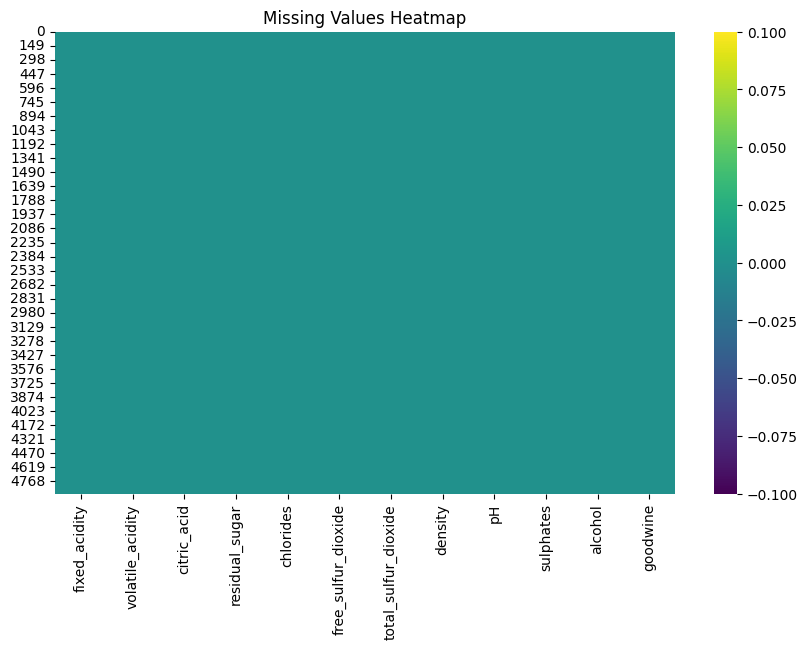

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cmap="viridis", cbar=True)
plt.title("Missing Values Heatmap")
plt.show()



---



>  1. **(a) (5) In your classification analysis you will use all other variables as predictors to predict `goodwine`, which takes on values of `1` if the wine is top quality and `0`, otherwise. Visualize the distribution of the target variable.**

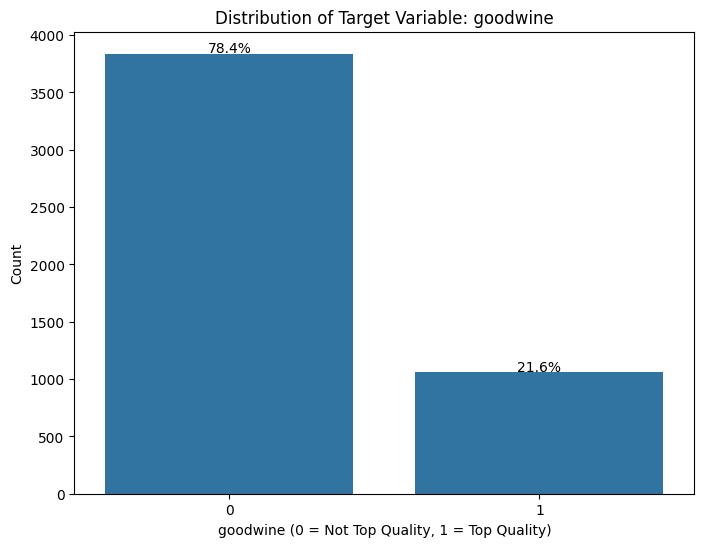

In [ ]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x='goodwine', data=data)
plt.title("Distribution of Target Variable: goodwine")
plt.xlabel("goodwine (0 = Not Top Quality, 1 = Top Quality)")
plt.ylabel("Count")

# Adding percentages on bars
total = len(data)
for p in ax.patches:
    count = p.get_height()
    percentage = f'{100 * count / total:.1f}%'
    ax.text(p.get_x() + p.get_width()/2., count + 10, percentage, ha='center')

plt.show()

>  1. **(b) (5) Based on your output in Question 1a, do you think class imbalance is present? Why or why not? Explain.**

Yes, class imbalance is present in the data. The visualization shows a significant disparity in the counts for the target variable 'goodwine' (0=Not Top Quality and 1=Top Quality). The count for Class 0 is approximately 3,800, while the count for Class 1 is only around 1,050. This means the majority class (Class 0) has roughly 3.6 times the number of samples as the minority class (Class 1), with the minority class making up only about 21.6% of the total observations.  model trained on this data could easily become biased toward the majority class and struggle to accurately predict the top-quality wines.



---



>  2. **(a) (5) Next, you will identify your predictor and target variables. Create `X`, which contains all predictor variables. Create `y`, which contains the target variable.**

In [ ]:
y = data['goodwine'] # Target variable
X = data.drop('goodwine', axis=1)  # Predictor variables
print(y.head())
print(X.head())

0    0
1    0
2    0
3    0
4    0
Name: goodwine, dtype: int64
   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  
0      8.

>  2. **(b) (5) Create the train and test sets from the `X` and `y` objects using a 75/25 train/test split and a random state of 123.**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=123)



---



>  3. **(a) (10) Fit the Logistic Regression model using sklearn. If you identified class imbalance in Question 1b, include the argument `class_weight = 'balanced'`. Use the liblinear solver and initialize a random state of 123. Then, obtain predctions.**

In [ ]:
logreg = LogisticRegression(solver='liblinear', class_weight='balanced',random_state=123 )# handling class imbalance
logreg.fit(X_train, y_train) # Training the model.
y_pred_logreg = logreg.predict(X_test) # Model testing
print("Predictions (first 10):", y_pred_logreg[:10]) #  viewing the first ten predictions

Predictions (first 10): [0 1 1 1 0 0 0 0 0 1]


>  3. **(b) (15) Next, you will fit 2 Naive Bayes models using sklearn. Then, obtain predictions for both models. Below is a description of the models:**
 * Model 1: Multinomial Bayes.
 * Model 2: If you identified class imbalance in Question 1b, use Complement Naive Bayes (`ComplementNB()`). Otherwise, use Gaussian Naive Bayes (`GaussianNB()`).

For more information, view the documentation:

* [ComplementNB](https://scikit-learn.org/dev/modules/generated/sklearn.naive_bayes.ComplementNB.html)

* [GaussianNB](https://scikit-learn.org/dev/modules/generated/sklearn.naive_bayes.GaussianNB.html)


In [ ]:
mnb = MultinomialNB() # Model 1: Multinomial Naive Bayes
mnb.fit(X_train, y_train)
y_pred_mnb = mnb.predict(X_test)

cnb = ComplementNB() #Model 2: Complement Naive Bayes to handle class imbalance)
cnb.fit(X_train, y_train)
y_pred_cnb = cnb.predict(X_test)

print("MultinomialNB predictions (first 10):", y_pred_mnb[:10]) # viewing first few predictions
print("ComplementNB predictions (first 10):", y_pred_cnb[:10])

MultinomialNB predictions (first 10): [0 0 1 1 0 0 0 0 0 0]
ComplementNB predictions (first 10): [0 1 1 1 0 0 0 0 0 0]


>  3. **(c) (15) In the class example [MultinomialNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) was used. In viewing the documentation for [ComplementNB](https://scikit-learn.org/dev/modules/generated/sklearn.naive_bayes.ComplementNB.html) and [GaussianNB](https://scikit-learn.org/dev/modules/generated/sklearn.naive_bayes.GaussianNB.html), why might these models be a better fit to the data? Explain.**

ComplementNB and GaussianNB may be better suited to this dataset than MultinomialNB because of its feature's characteristics and class distribution. ComplementNB is useful for imbalanced datasets, like this one where the minority class (goodwine = 1) makes up only  about 21.6% of observations. It adjusts feature weights to reduce bias toward the majority class, improving predictions for the minority class.

GaussianNB assumes continuous features follow a normal distribution, which aligns well with numeric wine measurements such as acidity, sugar, and pH. In contrast, MultinomialNB is designed for discrete count data and may not effectively model these continuous chemical features.  ComplementNB addresses class imbalance, while GaussianNB handles numeric data more appropriately



---

<br>

> 4. **(a) (15) Next, output the classification report for each of the 3 classification models you trained. Be sure that the output is labeled by model.**

In [ ]:
print("Logistic Regression Classification Report")
print(classification_report(y_test, y_pred_logreg))

print("Multinomial Naive Bayes Classification Report")
print(classification_report(y_test, y_pred_mnb))

print("Complement Naive Bayes Classification Report")
print(classification_report(y_test, y_pred_cnb))


Logistic Regression Classification Report
              precision    recall  f1-score   support

           0       0.92      0.67      0.78       978
           1       0.37      0.77      0.50       247

    accuracy                           0.69      1225
   macro avg       0.65      0.72      0.64      1225
weighted avg       0.81      0.69      0.72      1225

Multinomial Naive Bayes Classification Report
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       978
           1       0.37      0.36      0.37       247

    accuracy                           0.75      1225
   macro avg       0.61      0.60      0.60      1225
weighted avg       0.75      0.75      0.75      1225

Complement Naive Bayes Classification Report
              precision    recall  f1-score   support

           0       0.89      0.60      0.72       978
           1       0.31      0.71      0.43       247

    accuracy                           0.62      

> 4. **(b) (10) The Sommelier is most interested in being able to correctly predict high quality wines. Based on this, which of the 3 classification models would you recommend? Explain.**

I would recommend Logistic Regression for this application because it maximizes the detection of high-quality wines. Logistic Regression achieves the highest recall=0.77 and F1-score=0.50 among the three models. This means that it correctly identifies the largest proportion of top-quality wines while  maintaining a reasonable balance between precision=0.37 and recall  .

 MultinomialNB and ComplementNB have lower recall and F1-scores for Class 1, making them less effective for this purpose.

> 4. **(c) (10) Quality is very important for the company. It would be highly embarrassing to distribute a wine to hotel guests that was predicted to be high quality, but was actually low quality. With this in mind, would your recommended model change? Why or why not? Explain.**

Yes, the recommended model must change. Since the company wants to avoid predicting low-quality wine as high quality, precision becomes most critical metric, outweighing recall.    

The current Logistic Regression model is unsuitable because its low precision (0.37) indicates that it would still incorrectly predict many low-quality wines as top-quality, which is an unacceptable business risk. Hence, a different model or a tuned version that significantly prioritizes higher precision is necessary

> 4. **(d) (10) Finally, based on your output in Question 4a and considering the information provided in Question 4b and your response, is this a good model for the Ritz Carlton Hotel Company to use to predict if a wine is high quality? Why or why not? Explain.**

No, the current model is not suitable for deployment.

Although Logistic Regression captures many high-quality wines (high recall), its low precision means most wines predicted as high quality would actually be low quality and this is an unacceptable risk for a luxury brand like Ritz Carlton and may severely damage brand reputation.
 The model would need improvements that reduce false positives and increase precision before deployment.

<hr>